In [9]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Parameters, Minimizer
from lmfit.models import LorentzianModel,ConstantModel

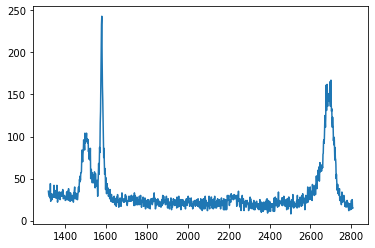

In [11]:
data=np.genfromtxt('ramanBLG.csv',delimiter=',')
x=data[:,0]
y=data[:,1]
plt.plot(x,y)

In [13]:
#limit the data between 2500 to 2800
rs=x[abs(x-2800).argmin():abs(x-2500).argmin()]
intensity=y[abs(x-2800).argmin():abs(x-2500).argmin()]

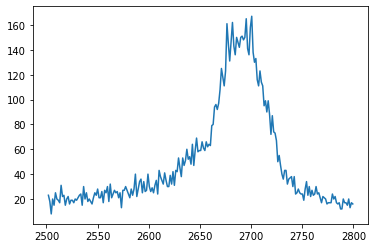

In [14]:
plt.plot(rs,intensity)

In [25]:
#use a constant as the background
model=ConstantModel()
params=model.make_params()
params['c'].set(15,min=0, max=25)

#the data will fit with 4 Lorentizian
l1=LorentzianModel(prefix='l1_')
l2=LorentzianModel(prefix='l2_')
l3=LorentzianModel(prefix='l3_')
l4=LorentzianModel(prefix='l4_')

# make some guess
#This is important for the fit to converge
p1=l1.make_params()
p1['l1_center'].set(2640,min=2500, max=2800)
p1['l1_amplitude'].set(100,min=0)

p2=l2.make_params()
p2['l2_center'].set(2680,min=2500, max=2800)
p2['l2_amplitude'].set(400,min=0)

p3=l3.make_params()
p3['l3_center'].set(2700,min=2500, max=2800)
p3['l3_amplitude'].set(400,min=0)

p4=l4.make_params()
p4['l4_center'].set(2720,min=2500, max=2800)
p4['l4_amplitude'].set(100,min=0)

In [26]:
model=model+l1+l2+l3+l4
params.update(p1)
params.update(p2)
params.update(p3)
params.update(p4)

name,value,initial value,min,max,vary,expression
c,15.0000000,None,0.00000000,25.0000000,True,
l1_amplitude,100.000000,None,0.00000000,inf,True,
l1_center,2640.00000,None,2500.00000,2800.00000,True,
l1_sigma,1.00000000,None,0.00000000,inf,True,
l1_fwhm,2.00000000,None,-inf,inf,False,2.0000000*l1_sigma
l1_height,31.8309900,None,-inf,inf,False,"0.3183099*l1_amplitude/max(1e-15, l1_sigma)"
l2_amplitude,400.000000,None,0.00000000,inf,True,
l2_center,2680.00000,None,2500.00000,2800.00000,True,
l2_sigma,1.00000000,None,0.00000000,inf,True,
l2_fwhm,2.00000000,None,-inf,inf,False,2.0000000*l2_sigma


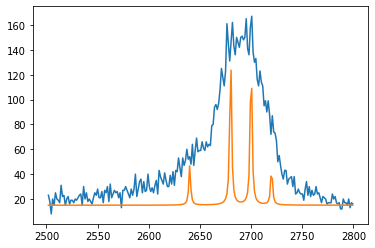

In [27]:
# lets try this initial guess
init=model.eval(params=params,x=rs)
plt.plot(rs,intensity)
plt.plot(rs,init)

In [28]:
# lets do the fit
result=model.fit(data=intensity,params=params,x=rs)
comps=result.eval_components()

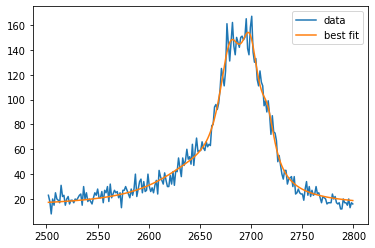

In [44]:
plt.plot(rs,intensity, label='data')
plt.plot(rs, result.best_fit, label='best fit')
plt.legend()

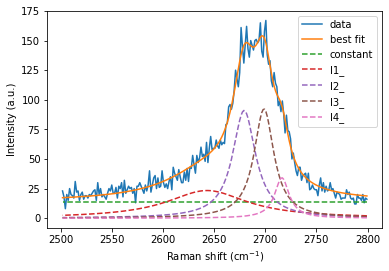

In [46]:
plt.plot(rs,intensity, label='data')
plt.plot(rs, result.best_fit, label='best fit')
for name, comp in comps.items():
    if name == "constant":
        plt.plot(rs, [comp]*len(rs),'--',label=name)
    else:
        plt.plot(rs,comp, '--', label=name)
plt.legend(loc='upper right')
plt.xlabel(r'Raman shift (cm$^{-1}$)')
plt.ylabel(r'Intensity (a.u.)')
plt.show()